In [1]:
from graph import Map, Graph
from evaluateRoleC import *
from evaluateRoleV import * 
from gui import *

### Generating the Game Map
- Quarantine -> Green
- Playground -> Yellow
- Vaccine -> Red
- Nothing -> Grey


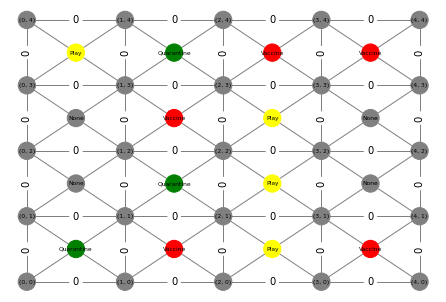

In [2]:

# Map(row, col) = Generates a map of (row col)
game_map = Map(4,4)

# Generates the graph with edges and nodes of dimensions
#(row+1, col+1)
#All costs will be 0 until the paths are evaluated based on the role
game_map.generateGraph()

# Displays the game graph using Matplotlib and Networkx
viewMap(game_map)


### Choose starting and end coordinates
1. Grid uses a coordination system
2. Choose a (row,col) block(Not the nodes) for starting and endpoints
    - eg. (0,0) will be the bottom left block, and (r,c) will be the top right block
3. Depending on the endpoints block type will determine the role to evaluate


Vaccine


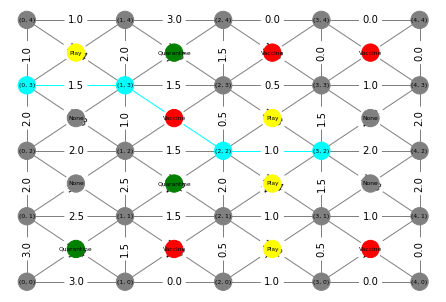

In [3]:
#Choose Starting Positions
start=(0,3)

end=(3,2)

block_type = game_map.map[end]

print(block_type)

results = []
filter_role = ""

if block_type == "Quarantine":
    role_c = {
        "Quarantine": 0, 
        "Vaccine": 2, 
        "Play": 3,
        "None": 1,
    }
    game_map.setCosts(role_c)
    start_node = (start[0]+1, start[1]+1)
    end_node = (end[0]+1, end[1]+1)
    
    results = evaluateRoleC(game_map, start_node, end_node, roleCHeuristic)
    filter_role = "V"

    
elif block_type == "Vaccine":
    role_v = {
        "Quarantine": 3, 
        "Vaccine": 0, 
        "Play": 1,
        "None": 2,
    }
    game_map.setCosts(role_v)
    results = evaluateRoleV(game_map, start, end, roleVHeuristic)
    

if results == None:
    print("No path was found!")
else:
    print(results)
    viewMap(game_map, results, filter_role)


    
